In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import statsmodels.api as sm
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [3]:
files=['akshay1.csv', 'akshay2.csv', 'akshay3.csv', 'Chaitanya1.csv' ,'Chaitanya2.csv' ,'Chaitanya3.csv' ,'Hitarth1.csv', 'Hitarth2.csv', 'Hitarth3.csv', 'shivang51.csv', 'shivang52.csv', 'shivang53.csv' ,'shruti1.csv' ,'sparsh1.csv', 'sparsh2.csv', 'sparsh3.csv']
cols=['Output1', 'Output2', 'Output3', 'Output4', 'var1', 'var2', 'var3', 'var4',]
final_df=[]
target_var=[]
for name in files:
    df=pd.read_csv(name)
    df.columns=cols
    df=df.drop(cols[4:], axis=1)
    indi=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1]
    st_ind=['start zero.png', 'start one.png', 'start two.jpg', 'start three.jpg', 'start four.jpg', 'start five.jpg', 'start six.jpg', 'start seven.jpg', 'start eight.jpg', 'start nine.jpg', 'start animal.jpg']
    end_ind=['end zero.png', 'end one.png', 'end two.jpg', 'end three.jpg', 'end four.jpg', 'end five.jpg', 'end six.jpg', 'end seven.jpg', 'end eight.jpg', 'end nine.jpg', 'end animal.jpg']
    final_df1=[]
    for a, b, inde in zip(st_ind, end_ind, indi):
        target_var.append(inde)
        start_idx = df[df['Output1'] == a].index
        end_idx = df[df['Output1'] == b].index
        temp_df1=[]

        for i, j in zip(start_idx, end_idx):
            row = df[i+1:j]
        
            temp_df1.append(row)
            
        merged_df1=pd.concat(temp_df1, ignore_index=True, sort=False)
        merged_df1=merged_df1.reindex(range(len(merged_df1)))
        final_df.append(merged_df1)

print(final_df)

[     Output1 Output2 Output3 Output4
0     282753  128791  716684  381153
1     282707  128866  716618  381158
2     282761  128734  716524  381112
3     282881  128593  716651  381137
4     282836  128618  716678  381110
...      ...     ...     ...     ...
1275  279464  129271  718793  379804
1276  279558  129153  718793  379813
1277  279629  128981  718799  379761
1278  279564  128999  718796  379710
1279  279461  129175  718795  379738

[1280 rows x 4 columns],      Output1 Output2 Output3 Output4
0     303509  127398  700234  387963
1     303401  127541  700246  387968
2     303345  127669  700253  388013
3     303415  127616  700251  388041
4     303516  127438  700244  388009
...      ...     ...     ...     ...
1182  299917  126804  703148  386764
1183  300011  126626  703141  386724
1184  299984  126572  703144  386673
1185  299879  126717  703149  386687
1186  299834  126856  703159  386744

[1187 rows x 4 columns],      Output1 Output2 Output3 Output4
0     259521  137850  

In [4]:
lengths=[]
for a in final_df:
    lengths.append(len(a))
med=statistics.median(lengths)
print(med)

1280.0


In [5]:
# Function to resample an array to the target length
def resample_array(array, target_length):
    # Create an array of indices for the input array
    input_indices = np.linspace(0, len(array)-1, len(array))

    # Create an array of indices for the resampled array
    resampled_indices = np.linspace(0, len(array)-1, target_length)

    # Create a linear interpolation function based on the input array
    interpolator = interp1d(input_indices, array, kind='linear')

    # Use the interpolator to create the resampled array
    resampled_array = interpolator(resampled_indices)

    return resampled_array.tolist()

In [6]:
median_length=int(med)
fin_df=[]
for i in range(176):
    dff=final_df[i]
    new_df=pd.DataFrame()
    
    for o in ['Output1', 'Output2', 'Output3', 'Output4']:
        val=dff[o].values
        ans = resample_array(val, median_length)
        new_df[o] = pd.Series(ans)
    fin_df.append(new_df)
print(fin_df)

[       Output1   Output2   Output3   Output4
0     282753.0  128791.0  716684.0  381153.0
1     282707.0  128866.0  716618.0  381158.0
2     282761.0  128734.0  716524.0  381112.0
3     282881.0  128593.0  716651.0  381137.0
4     282836.0  128618.0  716678.0  381110.0
...        ...       ...       ...       ...
1275  279464.0  129271.0  718793.0  379804.0
1276  279558.0  129153.0  718793.0  379813.0
1277  279629.0  128981.0  718799.0  379761.0
1278  279564.0  128999.0  718796.0  379710.0
1279  279461.0  129175.0  718795.0  379738.0

[1280 rows x 4 columns],             Output1        Output2        Output3        Output4
0     303509.000000  127398.000000  700234.000000  387963.000000
1     303408.853010  127530.602033  700245.127443  387967.636435
2     303353.143862  127650.385457  700251.982017  388006.455825
3     303399.730258  127627.561376  700251.436278  388034.892103
4     303486.623925  127489.771697  700246.035966  388018.307271
...             ...            ...         

In [7]:
print(len(fin_df))

176


In [8]:
print(target_var)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1]


In [9]:
samples=1280
fs=samples//5
freq=np.linspace(0, fs/2, samples)
pows=[]
ctr=0
for i in range(len(fin_df)):
    p1=[]
    p2=[]
    p3=[]
    p4=[]

    for f in freq:
        r1, s1=sm.regression.linear_model.burg(fin_df[i]['Output1'], order=5)
        r2, s2=sm.regression.linear_model.burg(fin_df[i]['Output2'], order=5)
        r3, s3=sm.regression.linear_model.burg(fin_df[i]['Output3'], order=5)
        r4, s4=sm.regression.linear_model.burg(fin_df[i]['Output4'], order=5)

        af1=1+np.sum([r1[x]*np.exp(-2j*np.pi*x*f) for x in range(len(r1))], axis=0)
        if(s1**2/(np.abs(af1)**2)==np.NaN):
            ctr=ctr+1
        p1.append(s1**2/(np.abs(af1)**2))
        af2=1+np.sum([r2[x]*np.exp(-2j*np.pi*x*f) for x in range(len(r2))], axis=0)
        if(s2**2/(np.abs(af2)**2)==np.NaN):
            ctr=ctr+1
        p2.append(s2**2/(np.abs(af2)**2))
        af3=1+np.sum([r3[x]*np.exp(-2j*np.pi*x*f) for x in range(len(r3))], axis=0)
        if(s3**2/(np.abs(af3)**2)==np.NaN):
            ctr=ctr+1
        p3.append(s3**2/(np.abs(af3)**2))
        af4=1+np.sum([r4[x]*np.exp(-2j*np.pi*x*f) for x in range(len(r4))], axis=0)
        if(s4**2/(np.abs(af4)**2)==np.NaN):
            ctr=ctr+1
        p4.append(s4**2/(np.abs(af4)**2))

    df=pd.DataFrame({
        'Power1':p1,
        'Power2':p2,
        'Power3':p3,
        'Power4':p4
    })
    pows.append(df)
print(pows)

[           Power1       Power2        Power3       Power4
0     2175.837698   355.769830  12815.446183  3729.867292
1     4130.633540  1787.931730  19280.340013  9211.718133
2     3336.333548   546.059089  19572.758522  5738.240219
3      958.661852   349.085357  15403.074113  2248.317765
4      914.098009   509.560085  10820.116496  2040.332921
...           ...          ...           ...          ...
1275   914.098009   509.560085  10820.116496  2040.332921
1276   958.661852   349.085357  15403.074113  2248.317765
1277  3336.333548   546.059089  19572.758522  5738.240219
1278  4130.633540  1787.931730  19280.340013  9211.718133
1279  2175.837698   355.769830  12815.446183  3729.867292

[1280 rows x 4 columns],            Power1       Power2       Power3       Power4
0     2261.805550  1319.952663  4383.457495  1624.259503
1     4396.745987  4178.110045  5676.596877  3456.513497
2     2702.298481  1608.252375  5597.400935  1916.593668
3     1096.522504  1411.357153  3558.217195   869

In [10]:
print(ctr)

0


In [11]:
st_final_df1=[]
for i in range(len(pows)):
    scaler = StandardScaler()
    standard_df1=scaler.fit_transform(pows[i])
    standard_df1=pd.DataFrame(standard_df1, columns=cols[:4])
    st_final_df1.append(standard_df1)
print(st_final_df1)

[       Output1   Output2   Output3   Output4
0    -0.098007 -0.521951 -0.528442 -0.270562
1     1.111002  1.233954  0.960552  1.329633
2     0.619740 -0.288646  1.027902  0.315698
3    -0.850809 -0.530146  0.067540 -0.703038
4    -0.878371 -0.333396 -0.988006 -0.763750
...        ...       ...       ...       ...
1275 -0.878371 -0.333396 -0.988006 -0.763750
1276 -0.850809 -0.530146  0.067540 -0.703038
1277  0.619740 -0.288646  1.027902  0.315698
1278  1.111002  1.233954  0.960552  1.329633
1279 -0.098007 -0.521951 -0.528442 -0.270562

[1280 rows x 4 columns],        Output1   Output2   Output3   Output4
0     0.131085 -0.211399  0.215057  0.011026
1     1.556599  2.046373  1.092588  1.657811
2     0.425205  0.016340  1.038846  0.273769
3    -0.646983 -0.139195 -0.344956 -0.666928
4    -0.964770 -0.987745 -1.176800 -0.878196
...        ...       ...       ...       ...
1275 -0.964770 -0.987745 -1.176800 -0.878196
1276 -0.646983 -0.139195 -0.344956 -0.666928
1277  0.425205  0.016340  1.

In [12]:
inp_x=[]
for p in st_final_df1:
    arr=p[['Output1', 'Output2', 'Output3', 'Output4']].values.tolist()
    inp_x.append(arr)

print(inp_x[0])

[[-0.09800670077214167, -0.5219505479608049, -0.5284420033535614, -0.27056212059034296], [1.111001619481687, 1.23395436869889, 0.9605518690972776, 1.3296328363812395], [0.6197404463701615, -0.28864602821244306, 1.0279016787568453, 0.31569757928626224], [-0.850809470687064, -0.5301460588635106, 0.06754027153780996, -0.7030379670477716], [-0.878371457150347, -0.33339570393079154, -0.9880061904426809, -0.7637503629342158], [-0.5350493868471563, -0.6100452472780874, -1.722978697528789, -0.7634098781709264], [-0.8803609927138752, -0.3303983798727646, -0.9770228032205145, -0.7638130398726423], [-0.8479261898210505, -0.5319809840863136, 0.07074563984305349, -0.7012108209600005], [0.6478035367022696, -0.27918535734183547, 1.041935302587311, 0.3372165065184672], [1.087849895969167, 1.1742019168811715, 0.9410934776455568, 1.2971500846199349], [-0.09795322006792845, -0.5219143565292368, -0.5283484523538282, -0.27050028750950644], [1.1343945648337839, 1.295660236959849, 0.9799460172524735, 1.36241

In [13]:
inp_y=[]
for dfi, x in zip(fin_df, target_var):
    for i in range(1280):
        inp_y.append(x)
print(len(inp_y))

225280


In [14]:
inp=np.array(inp_x)
inp.resize((len(inp_x)*len(inp_x[0])), len(inp_x[0][0]))
print(len(inp))

225280


In [15]:
grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [16]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [17]:
g_res = gs.fit(inp, inp_y)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [18]:
g_res.best_score_

0.1658737315874946

In [19]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

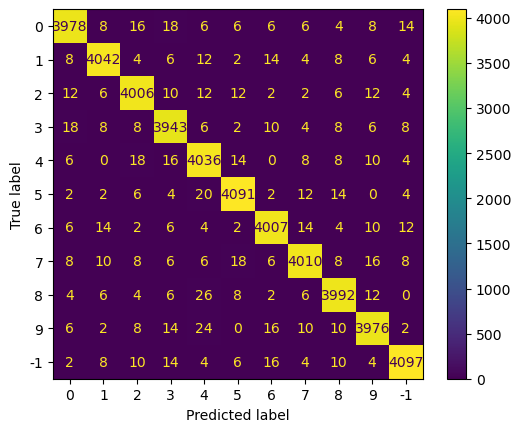

In [20]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(inp, inp_y, test_size=0.2, random_state=1)

# Feature scaling
# sc = StandardScaler()
# X_train = sc.fit_transform(np.array(X_train))
# X_test = sc.transform(np.array(X_test))

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')

# Fit the classifier to the data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Output confusion matrix and classification report
cm=confusion_matrix(y_test, y_pred)
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '-1'])
cm_disp.plot()

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.98      0.98      0.98      4070
           0       0.98      0.98      0.98      4110
           1       0.98      0.98      0.98      4084
           2       0.98      0.98      0.98      4021
           3       0.97      0.98      0.98      4120
           4       0.98      0.98      0.98      4157
           5       0.98      0.98      0.98      4081
           6       0.98      0.98      0.98      4104
           7       0.98      0.98      0.98      4066
           8       0.98      0.98      0.98      4068
           9       0.99      0.98      0.98      4175

    accuracy                           0.98     45056
   macro avg       0.98      0.98      0.98     45056
weighted avg       0.98      0.98      0.98     45056

